In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

import os
import random

df_data_dictionary = pd.read_csv('/Users/shashank/Desktop/CSM148/W22Project 3/data/DataDictionary.csv')
                            
print(df_data_dictionary)

                        
                        

           Feature Name                                        Description  \
0                 State  State where the sales occurred (for our datase...   
1               Channel  Options between legal (licensed) and grey mark...   
2           Category L1  Highest-level category for product. Options in...   
3           Category L2  Next layer of categorization. Multiple product...   
4           Category L3                     Further detail on product-type   
5           Category L4                     Further detail on product-type   
6           Category L5                     Further detail on product-type   
7                 Brand        Product brand (multiple brands represented)   
8   Product Description  Plain text description of the product. Often a...   
9       Total Sales ($)                  Cumulative total sales in dollars   
10          Total Units                        Cumulative total sold units   
11                  ARP              Average retail price across

In [155]:

df_sales = pd.read_csv('/Users/shashank/Desktop/CSM148/W22Project 3/data/BrandTotalSales.csv')
df_units = pd.read_csv('/Users/shashank/Desktop/CSM148/W22Project 3/data/BrandTotalUnits.csv')
#df_sales.head(5)
df_units.shape

(27686, 4)

In [156]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Months           25279 non-null  object
 1   Brand            25279 non-null  object
 2   Total Sales ($)  25279 non-null  object
dtypes: object(3)
memory usage: 592.6+ KB


In [157]:
df_sales['Months'] = pd.to_datetime(df_sales['Months'])
df_sales['Total Sales ($)'] = df_sales['Total Sales ($)'].astype(str).str[:8]
df_sales['Total Sales ($)'] = df_sales['Total Sales ($)'].str.replace(',', '')
df_sales['Total Sales ($)'] = pd.to_numeric(df_sales['Total Sales ($)'])

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Months           25279 non-null  datetime64[ns]
 1   Brand            25279 non-null  object        
 2   Total Sales ($)  25279 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 592.6+ KB


In [158]:
df_sales.shape

(25279, 3)

In [159]:
df_units['Months'] = pd.to_datetime(df_units['Months'])
df_units['Total Units'] = df_units['Total Units'].astype(str).str[:8]
df_units['Total Units'] = df_units['Total Units'].str.replace(',', '').astype(float)
df_units['Total Units'] = pd.to_numeric(df_units['Total Units'])

df_units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27686 entries, 0 to 27685
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brands            27686 non-null  object        
 1   Months            27686 non-null  datetime64[ns]
 2   Total Units       25712 non-null  float64       
 3   vs. Prior Period  24935 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 865.3+ KB


In [160]:
brands = df_units["Brands"].unique()
print(brands)

['#BlackSeries' '101 Cannabis Co.' '10x Infused' ... 'Zlixir' 'Zoma'
 'Zuma Topicals']


In [161]:
units = df_units[df_units.Brands == '101 Cannabis Co.']
units

,Brands,Months,Total Units,vs. Prior Period
5,101 Cannabis Co.,2019-11-01,131.0677,NaN
6,101 Cannabis Co.,2019-12-01,NaN,-1.000000
7,101 Cannabis Co.,2020-01-01,345.4134,NaN
8,101 Cannabis Co.,2020-02-01,696.6584,1.016883
9,101 Cannabis Co.,2020-03-01,943.3933,0.354169
10,101 Cannabis Co.,2020-04-01,712.4981,-0.244750
11,101 Cannabis Co.,2020-05-01,619.8410,-0.130045
12,101 Cannabis Co.,2020-06-01,426.1504,-0.312484
13,101 Cannabis Co.,2020-07-01,589.7193,0.383829
14,101 Cannabis Co.,2020-08-01,1018.5700,0.727218


In [162]:
units.loc[:, 'Previous Month'] = units.loc[:, 'Total Units'].shift(1)
units.loc[:, 'Rolling Average'] = (units.loc[:, 'Total Units'].shift(1) + units.loc[:, 'Total Units'].shift(2) + units.loc[:, 'Total Units'].shift(3))/3

units


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Brands,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average
5,101 Cannabis Co.,2019-11-01,131.0677,NaN,NaN,NaN
6,101 Cannabis Co.,2019-12-01,NaN,-1.000000,131.0677,NaN
7,101 Cannabis Co.,2020-01-01,345.4134,NaN,NaN,NaN
8,101 Cannabis Co.,2020-02-01,696.6584,1.016883,345.4134,NaN
9,101 Cannabis Co.,2020-03-01,943.3933,0.354169,696.6584,NaN
10,101 Cannabis Co.,2020-04-01,712.4981,-0.244750,943.3933,661.821700
11,101 Cannabis Co.,2020-05-01,619.8410,-0.130045,712.4981,784.183267
12,101 Cannabis Co.,2020-06-01,426.1504,-0.312484,619.8410,758.577467
13,101 Cannabis Co.,2020-07-01,589.7193,0.383829,426.1504,586.163167
14,101 Cannabis Co.,2020-08-01,1018.5700,0.727218,589.7193,545.236900


In [163]:
#Think about also implementing an average growth rate feature!

In [164]:
sales = df_sales[df_sales.Brand == '101 Cannabis Co.']

sales

,Months,Brand,Total Sales ($)
7908,2019-11-01,101 Cannabis Co.,4465.04
9146,2020-01-01,101 Cannabis Co.,11790.60
9765,2020-02-01,101 Cannabis Co.,20266.70
10424,2020-03-01,101 Cannabis Co.,30465.40
11110,2020-04-01,101 Cannabis Co.,23465.60
11799,2020-05-01,101 Cannabis Co.,21348.30
12530,2020-06-01,101 Cannabis Co.,14111.70
13267,2020-07-01,101 Cannabis Co.,18948.50
14024,2020-08-01,101 Cannabis Co.,32743.40
14808,2020-09-01,101 Cannabis Co.,44839.60


In [165]:
units = units.merge(sales, left_on='Months', right_on='Months')

In [166]:
units = units.drop(['Brands'], 1)

In [167]:
units.head()

,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Brand,Total Sales ($)
0,2019-11-01,131.0677,NaN,NaN,NaN,101 Cannabis Co.,4465.04
1,2020-01-01,345.4134,NaN,NaN,NaN,101 Cannabis Co.,11790.60
2,2020-02-01,696.6584,1.016883,345.4134,NaN,101 Cannabis Co.,20266.70
3,2020-03-01,943.3933,0.354169,696.6584,NaN,101 Cannabis Co.,30465.40
4,2020-04-01,712.4981,-0.244750,943.3933,661.8217,101 Cannabis Co.,23465.60


In [168]:
df_details = pd.read_csv('/Users/shashank/Desktop/CSM148/W22Project 3/data/BrandDetails.csv')

df_details = df_details[df_details.Brand == '101 Cannabis Co.']
df_details.head()

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
5,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Skywalker OG - Wax,"3,261.12486",...,0,0,THC Only,NaN,Skywalker OG,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$30.00 to $34.99
6,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Skywalker OG - Wax,"2,062.231412",...,0,0,THC Only,NaN,Skywalker OG,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$20.00 to $24.99
7,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Indica Strain Blends - Wax,62.556665,...,0,0,THC Only,NaN,Indica Strain Blends,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
8,California,Licensed,Inhaleables,Pre-Rolled,Infused Pre-Rolled,NaN,NaN,101 Cannabis Co.,101 Cannabis Co. - Hybrid Strain Blends - Infu...,"1,309.279796",...,0,0,THC Only,NaN,NaN,NaN,Not Mood Specific,Non-Generic Vendors,Generic Items,$25.00 to $29.99


In [169]:
value = 0
value1 = 0
value2 = 0

if 'Inhaleables' in df_details['Category L1'].values:
    value = 1
if 'Edibles' in df_details['Category L1'].values:
    value1 = 1
if 'Wedding Cake' in df_details['Strain']:
    value2 = 1
    
units['Inhaleables'] = value
units['Edibles'] = value1
units['Wedding Cake'] = value2

df_details

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
5,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Skywalker OG - Wax,"3,261.12486",...,0,0,THC Only,NaN,Skywalker OG,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$30.00 to $34.99
6,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Skywalker OG - Wax,"2,062.231412",...,0,0,THC Only,NaN,Skywalker OG,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$20.00 to $24.99
7,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Indica Strain Blends - Wax,62.556665,...,0,0,THC Only,NaN,Indica Strain Blends,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
8,California,Licensed,Inhaleables,Pre-Rolled,Infused Pre-Rolled,NaN,NaN,101 Cannabis Co.,101 Cannabis Co. - Hybrid Strain Blends - Infu...,"1,309.279796",...,0,0,THC Only,NaN,NaN,NaN,Not Mood Specific,Non-Generic Vendors,Generic Items,$25.00 to $29.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Indica Strain Blends - Wax,391.60688,...,0,0,THC Only,NaN,Indica Strain Blends,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
77,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Super Glue - Wax,146.603967,...,0,0,THC Only,NaN,Super Glue,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$30.00 to $34.99
78,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Hybrid Strain Blends - Wax,"2,777.553694",...,0,0,THC Only,NaN,Hybrid Strain Blends,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$30.00 to $34.99
79,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Zookies - Wax,"3,344.676119",...,0,0,THC Only,NaN,Zookies,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$40.00 to $44.99


In [170]:
units

,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Brand,Total Sales ($),Inhaleables,Edibles,Wedding Cake
0,2019-11-01,131.0677,NaN,NaN,NaN,101 Cannabis Co.,4465.04,1,0,0
1,2020-01-01,345.4134,NaN,NaN,NaN,101 Cannabis Co.,11790.60,1,0,0
2,2020-02-01,696.6584,1.016883,345.4134,NaN,101 Cannabis Co.,20266.70,1,0,0
3,2020-03-01,943.3933,0.354169,696.6584,NaN,101 Cannabis Co.,30465.40,1,0,0
4,2020-04-01,712.4981,-0.244750,943.3933,661.821700,101 Cannabis Co.,23465.60,1,0,0
5,2020-05-01,619.8410,-0.130045,712.4981,784.183267,101 Cannabis Co.,21348.30,1,0,0
6,2020-06-01,426.1504,-0.312484,619.8410,758.577467,101 Cannabis Co.,14111.70,1,0,0
7,2020-07-01,589.7193,0.383829,426.1504,586.163167,101 Cannabis Co.,18948.50,1,0,0
8,2020-08-01,1018.5700,0.727218,589.7193,545.236900,101 Cannabis Co.,32743.40,1,0,0
9,2020-09-01,1408.8500,0.383160,1018.5700,678.146567,101 Cannabis Co.,44839.60,1,0,0


In [171]:
product_count = (df_details.Brand == '101 Cannabis Co.').count()
strain_count = df_details['Strain'].nunique()

In [172]:
units['ProdCount'] = product_count
units['StrainCount'] = strain_count

units.head()

,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Brand,Total Sales ($),Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount
0,2019-11-01,131.0677,NaN,NaN,NaN,101 Cannabis Co.,4465.04,1,0,0,77,20
1,2020-01-01,345.4134,NaN,NaN,NaN,101 Cannabis Co.,11790.60,1,0,0,77,20
2,2020-02-01,696.6584,1.016883,345.4134,NaN,101 Cannabis Co.,20266.70,1,0,0,77,20
3,2020-03-01,943.3933,0.354169,696.6584,NaN,101 Cannabis Co.,30465.40,1,0,0,77,20
4,2020-04-01,712.4981,-0.244750,943.3933,661.8217,101 Cannabis Co.,23465.60,1,0,0,77,20


In [173]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [174]:
df_details = pd.read_csv('/Users/shashank/Desktop/CSM148/W22Project 3/data/BrandDetails.csv')
df_details

,State,Channel,Category L1,Category L2,Category L3,Category L4,Category L5,Brand,Product Description,Total Sales ($),...,Total THC,Total CBD,Contains CBD,Pax Filter,Strain,Is Flavored,Mood Effect,Generic Vendor,Generic Items,$5 Price Increment
0,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),"1,103.964857",...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
1,California,Licensed,Inhaleables,Flower,Hybrid,NaN,NaN,#BlackSeries,#BlackSeries - Vanilla Frosting - Flower (Gram),674.645211,...,0,0,THC Only,NaN,Vanilla Frosting,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
2,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"2,473.699102",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$15.00 to $19.99
3,California,Licensed,Inhaleables,Flower,Sativa Dominant,NaN,NaN,#BlackSeries,#BlackSeries - Blueberry Slushy - Flower (Gram),"14,589.916417",...,0,0,THC Only,NaN,Blueberry Slushy,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$10.00 to $14.99
4,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Wax,NaN,101 Cannabis Co.,101 Cannabis Co. - Afghan Kush - Wax,145.39627,...,0,0,THC Only,NaN,Afghan Kush,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144972,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"3,051.854478",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$40.00 to $44.99
144973,California,Licensed,Inhaleables,Pre-Rolled,Pre-Rolled,NaN,NaN,Zkittlez,"Zkittlez - Blueberry Zkittlez - Pre-Rolled, 0....","6,776.219336",...,0,0,THC Only,NaN,Blueberry Zkittlez,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$35.00 to $39.99
144974,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"4,341.808787",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$45.00 to $49.99
144975,California,Licensed,Inhaleables,Concentrates,Dabbable Concentrates,Live Resin,NaN,Zkittlez,Zkittlez - Lemon Drop - Live Resin,"6,764.1640020000000",...,0,0,THC Only,NaN,Lemon Drop,NaN,Not Mood Specific,Non-Generic Vendors,Non-Generic Items,$60.00 to $64.99


In [175]:
df_sales

,Months,Brand,Total Sales ($)
0,2018-09-01,10x Infused,1711.33
1,2018-09-01,1964 Supply Co.,25475.20
2,2018-09-01,3 Bros Grow,120153.00
3,2018-09-01,3 Leaf,6063.52
4,2018-09-01,350 Fire,631510.00
...,...,...,...
25274,2021-09-01,Yummi Karma,458600.00
25275,2021-09-01,Zanna,3681.15
25276,2021-09-01,Zendo Edibles,11508.20
25277,2021-09-01,Zig Zag,18077.30


In [176]:
df_final = pd.DataFrame()
print(df_final.shape)
for brand in brands:
    brand_units = df_units[df_units.Brands == brand]
    brand_units.loc[:, 'Previous Month'] = brand_units.loc[:, 'Total Units'].shift(1)
    brand_units.loc[:, 'Rolling Average'] = (brand_units.loc[:, 'Total Units'].shift(1) + brand_units.loc[:, 'Total Units'].shift(2) + brand_units.loc[:, 'Total Units'].shift(3))/3

    brand_sales = df_sales[df_sales.Brand == brand]

    brand_units = brand_units.merge(brand_sales, left_on='Months', right_on='Months')
    brand_units = brand_units.drop(['Brand'], 1)

    brand_details = df_details[df_details.Brand == brand]

    value = 0
    value1 = 0
    value2 = 0

    if 'Inhaleables' in df_details['Category L1'].values:
        value = 1
    if 'Edibles' in df_details['Category L1'].values:
        value1 = 1
    if 'Wedding Cake' in df_details['Strain']:
        value2 = 1

    brand_units['Inhaleables'] = value
    brand_units['Edibles'] = value1
    brand_units['Wedding Cake'] = value2

    #product_count = brand_details['Brand'].count()
    product_count = len(brand_details[brand_details.Brand == brand])
    strain_count = len(brand_details['Strain'])

    brand_units['ProdCount'] = product_count
    brand_units['StrainCount'] = strain_count
    df_final = df_final.append(brand_units, ignore_index=True)

print(df_final.shape)
print('done')
            
    

(0, 0)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


(25279, 12)
done


In [177]:
df_final.head()

,Brands,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Total Sales ($),Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount
0,#BlackSeries,2020-08-01,1616.3300,NaN,NaN,NaN,25352.10,1,0,0,4,4
1,#BlackSeries,2021-01-01,715.5328,NaN,NaN,NaN,9739.42,1,0,0,4,4
2,#BlackSeries,2021-02-01,766.6691,0.071466,715.5328,NaN,9102.80,1,0,0,4,4
3,101 Cannabis Co.,2019-11-01,131.0677,NaN,NaN,NaN,4465.04,1,0,0,77,77
4,101 Cannabis Co.,2020-01-01,345.4134,NaN,NaN,NaN,11790.60,1,0,0,77,77


In [178]:
df_final.columns[df_final.isnull().any()]
#Total Units - Median
#vs. Prior Period - Median
#Previous Month - Median
#Rolling Average - Median

Index(['vs. Prior Period', 'Previous Month', 'Rolling Average'], dtype='object')

In [179]:
#sns.distplot(df_final['Total Units'])
#sns.distplot(df_final['vs. Prior Period'])
#sns.distplot(df_final['Previous Month'])
#sns.distplot(df_final['Rolling Average'])

In [180]:
df_final['vs. Prior Period'] = df_final['vs. Prior Period'].fillna(df_final['vs. Prior Period'].median())
df_final['Previous Month'] = df_final['Previous Month'].fillna(df_final['Previous Month'].median())
df_final['Rolling Average'] = df_final['Rolling Average'].fillna(df_final['Rolling Average'].median())

In [181]:
df_final.columns[df_final.isnull().any()]
df_final.shape

(25279, 12)

In [182]:
labels = df_final['Total Sales ($)']
df_final = df_final.drop(['Total Sales ($)'], axis = 1)

In [183]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25279 entries, 0 to 25278
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Brands            25279 non-null  object        
 1   Months            25279 non-null  datetime64[ns]
 2   Total Units       25279 non-null  float64       
 3   vs. Prior Period  25279 non-null  float64       
 4   Previous Month    25279 non-null  float64       
 5   Rolling Average   25279 non-null  float64       
 6   Inhaleables       25279 non-null  int64         
 7   Edibles           25279 non-null  int64         
 8   Wedding Cake      25279 non-null  int64         
 9   ProdCount         25279 non-null  int64         
 10  StrainCount       25279 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 2.1+ MB


In [184]:
df_final

,Brands,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount
0,#BlackSeries,2020-08-01,1616.3300,-0.020257,4418.3800,5931.411667,1,0,0,4,4
1,#BlackSeries,2021-01-01,715.5328,-0.020257,4418.3800,5931.411667,1,0,0,4,4
2,#BlackSeries,2021-02-01,766.6691,0.071466,715.5328,5931.411667,1,0,0,4,4
3,101 Cannabis Co.,2019-11-01,131.0677,-0.020257,4418.3800,5931.411667,1,0,0,77,77
4,101 Cannabis Co.,2020-01-01,345.4134,-0.020257,4418.3800,5931.411667,1,0,0,77,77
...,...,...,...,...,...,...,...,...,...,...,...
25274,Zoma,2020-08-01,604.2388,-0.636775,1663.5300,5931.411667,1,0,0,0,0
25275,Zuma Topicals,2019-08-01,312.5153,-0.020257,4418.3800,5931.411667,1,0,0,0,0
25276,Zuma Topicals,2019-09-01,464.3063,0.485707,312.5153,5931.411667,1,0,0,0,0
25277,Zuma Topicals,2019-10-01,348.0579,-0.250370,464.3063,5931.411667,1,0,0,0,0


In [185]:
df_final[:20223]
df_final[20223:]

,Brands,Months,Total Units,vs. Prior Period,Previous Month,Rolling Average,Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount
20223,Select Oil,2018-09-01,412198.0000,-0.026226,423300.0000,5931.411667,1,0,0,3003,3003
20224,Select Oil,2018-10-01,421679.0000,0.023000,412198.0000,5931.411667,1,0,0,3003,3003
20225,Select Oil,2018-11-01,378405.0000,-0.102622,421679.0000,419059.000000,1,0,0,3003,3003
20226,Select Oil,2018-12-01,421513.0000,0.113919,378405.0000,404094.000000,1,0,0,3003,3003
20227,Select Oil,2019-01-01,335209.0000,-0.204748,421513.0000,407199.000000,1,0,0,3003,3003
...,...,...,...,...,...,...,...,...,...,...,...
25274,Zoma,2020-08-01,604.2388,-0.636775,1663.5300,5931.411667,1,0,0,0,0
25275,Zuma Topicals,2019-08-01,312.5153,-0.020257,4418.3800,5931.411667,1,0,0,0,0
25276,Zuma Topicals,2019-09-01,464.3063,0.485707,312.5153,5931.411667,1,0,0,0,0
25277,Zuma Topicals,2019-10-01,348.0579,-0.250370,464.3063,5931.411667,1,0,0,0,0


In [186]:
df = df_final
X = df.drop(['Brands'], axis = 1)
X = X.drop(['Months'], axis = 1)
X['Year'] = pd.to_datetime(df['Months']).dt.year
X['Month'] = pd.to_datetime(df['Months']).dt.month

X_train = X.iloc[:20223]
y_train = labels[:20223]

X_test = X.iloc[20223:]
y_test = labels[20223:]

print(X_train.shape)
print(X_test.shape)

(20223, 11)
(5056, 11)


In [187]:
X

,Total Units,vs. Prior Period,Previous Month,Rolling Average,Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount,Year,Month
0,1616.3300,-0.020257,4418.3800,5931.411667,1,0,0,4,4,2020,8
1,715.5328,-0.020257,4418.3800,5931.411667,1,0,0,4,4,2021,1
2,766.6691,0.071466,715.5328,5931.411667,1,0,0,4,4,2021,2
3,131.0677,-0.020257,4418.3800,5931.411667,1,0,0,77,77,2019,11
4,345.4134,-0.020257,4418.3800,5931.411667,1,0,0,77,77,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
25274,604.2388,-0.636775,1663.5300,5931.411667,1,0,0,0,0,2020,8
25275,312.5153,-0.020257,4418.3800,5931.411667,1,0,0,0,0,2019,8
25276,464.3063,0.485707,312.5153,5931.411667,1,0,0,0,0,2019,9
25277,348.0579,-0.250370,464.3063,5931.411667,1,0,0,0,0,2019,10


In [188]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

categorical_features = ["Month", "Inhaleables", "Edibles", "Wedding Cake"]
numerical_features = [x for x in X_train.columns if x not in categorical_features]


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(20223, 22)
(5056, 22)


In [189]:
X_train

,Total Units,vs. Prior Period,Previous Month,Rolling Average,Inhaleables,Edibles,Wedding Cake,ProdCount,StrainCount,Year,Month
0,1616.3300,-0.020257,4418.3800,5931.411667,1,0,0,4,4,2020,8
1,715.5328,-0.020257,4418.3800,5931.411667,1,0,0,4,4,2021,1
2,766.6691,0.071466,715.5328,5931.411667,1,0,0,4,4,2021,2
3,131.0677,-0.020257,4418.3800,5931.411667,1,0,0,77,77,2019,11
4,345.4134,-0.020257,4418.3800,5931.411667,1,0,0,77,77,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
20218,38539.3000,0.243602,30990.1000,16128.653333,1,0,0,187,187,2021,5
20219,17857.5000,-0.536643,38539.3000,28008.400000,1,0,0,187,187,2021,6
20220,8489.6800,-0.524587,17857.5000,29128.966667,1,0,0,187,187,2021,7
20221,8738.6600,0.029327,8489.6800,21628.826667,1,0,0,187,187,2021,8


In [190]:
for y in y_train:
    if y < 0:
        print("neg")

In [191]:
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train_transformed, y_train)
y_pred = reg.predict(X_test_transformed)
#print(y_test)
#print(y_pred)
print(r2_score(y_test, y_pred))

import statsmodels.api as sm
sm_x = sm.add_constant(X_train_transformed)
stats = sm.OLS(y_train, sm_x)
result_stats = stats.fit()
print(result_stats.summary())

0.20051943192452926
                            OLS Regression Results                            
Dep. Variable:        Total Sales ($)   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     228.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:23:37   Log-Likelihood:            -2.7331e+05
No. Observations:               20223   AIC:                         5.466e+05
Df Residuals:                   20205   BIC:                         5.468e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.223e+04   5452.484

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

regr = RandomForestRegressor(n_estimators=50)
regr.fit(X_train_transformed, y_train)
y_pred = regr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.5486594438257175

In [193]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

reg = LinearRegression()
scores = cross_val_score(reg, X_train_transformed, y_train, scoring='r2', cv=folds)
scores
    


array([0.1612287 , 0.10677109, 0.17236696, 0.16720776, 0.16227605])

In [194]:
regr = RandomForestRegressor(n_estimators=50)
scores = cross_val_score(regr, X_train_transformed, y_train, scoring='r2', cv=folds)
scores


array([0.7648039 , 0.75098189, 0.781201  , 0.75191884, 0.77205088])

In [195]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

num_features = [1, 2, 4, 6, 8]

hyper_params = [{'n_features_to_select': num_features}]
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

regr = RandomForestRegressor(n_estimators=50)
regr.fit(X_train_transformed, y_train)
rfe = RFE(regr) 

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(X_train_transformed, y_train)

#Adapted from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(n_estimators=50)),
             param_grid=[{'n_features_to_select': [1, 2, 4, 6, 8]}],
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

#Adapted from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,54.795375,0.121516,0.042521,0.001961,1,{'n_features_to_select': 1},0.378059,0.382490,0.403111,0.389831,...,0.387094,0.008866,5,0.913319,0.912484,0.912886,0.912111,0.913228,0.912806,0.000455
1,54.123309,0.103915,0.037939,0.000695,2,{'n_features_to_select': 2},0.782836,0.775577,0.803132,0.773850,...,0.785957,0.011226,4,0.969256,0.969087,0.968158,0.969479,0.968540,0.968904,0.000485
2,52.122780,0.116077,0.037312,0.000368,4,{'n_features_to_select': 4},0.815318,0.798636,0.833813,0.799365,...,0.814358,0.013838,1,0.973038,0.972693,0.973403,0.972761,0.972840,0.972947,0.000256
3,48.983951,0.603496,0.038247,0.000680,6,{'n_features_to_select': 6},0.805143,0.801567,0.818107,0.789173,...,0.804999,0.009697,3,0.972360,0.972059,0.970874,0.971310,0.971027,0.971526,0.000583
4,88.240078,88.285338,0.039348,0.001955,8,{'n_features_to_select': 8},0.807348,0.803675,0.822555,0.795574,...,0.809109,0.009483,2,0.971852,0.971991,0.971906,0.971984,0.971763,0.971899,0.000085


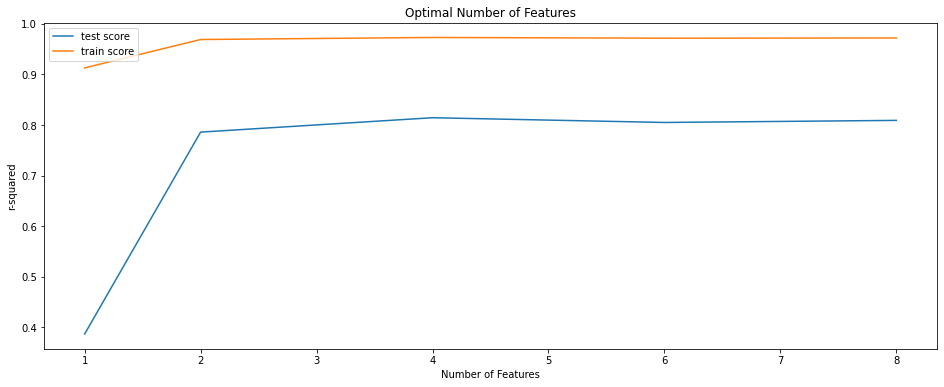

In [50]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of Features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

#Graph shows that optimal number of features is at 12

#Adapted from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [54]:
n_features_optimal = 4

regr = RandomForestRegressor(n_estimators=50)
regr.fit(X_train_transformed, y_train)

rfe = RFE(regr, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train_transformed, y_train)

# predict prices of X_test
y_pred = regr.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
print(r2)

0.5690859583452963


In [58]:
from sklearn.svm import SVR  

svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_lin.fit(X_train_transformed, y_train)

y_pred = svr_lin.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
r2

0.0702290825406865

In [59]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr_poly.fit(X_train_transformed, y_train)

y_pred = svr_poly.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
r2

0.152333126620524

In [60]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_transformed, y_train)

y_pred = svr_rbf.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
r2

0.09183062671079956

In [65]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=6)

pca_train = pca.fit_transform(X_train_transformed)

reg = LinearRegression().fit(pca_train, y_train)
pca_test = pca.transform(X_test_transformed)
predicted = reg.predict(pca_test)

r2_score(y_test, predicted)

0.1935544822276748

In [66]:
pca = decomposition.PCA(n_components=4)

pca_train = pca.fit_transform(X_train_transformed)

reg = LinearRegression().fit(pca_train, y_train)
pca_test = pca.transform(X_test_transformed)
predicted = reg.predict(pca_test)

r2_score(y_test, predicted)

0.19214572508705907

In [67]:
pca = decomposition.PCA(n_components=10)

pca_train = pca.fit_transform(X_train_transformed)

reg = LinearRegression().fit(pca_train, y_train)
pca_test = pca.transform(X_test_transformed)
predicted = reg.predict(pca_test)

r2_score(y_test, predicted)

0.1943122604484927